# 电影分类算法

In [1]:
import numpy as np
import operator

In [2]:
def createDataSet():
    # 四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    # 四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels

In [3]:
def classify0(inX, dataSet, labels, k):
    # numpy函数shape[0]：返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    # numpy函数tile：将inX重复dataSetSize次并排成一列
    # 假设dataSet是上面的group参数，inX为[0,1]，则下面的tile使得inX变为([0,1],[0,1],[0,1],[0,1])
    # diffMat用来求变化后的inX和dataSet的差，即求测试集与训练集的差距
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 二维特征相减后平方（用diffMat的转置乘diffMat），说白了就是每个元素都平方的意思
    sqDiffMat = diffMat**2
    # sum()所有元素相加，sum(0)列相加，sum(1)行相加，下面是按行相加的，意思是每一行都是测试点与一个训练点的距离平方
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方，计算出距离
    distances = sqDistances**0.5
    # argsort函数返回的是distances值从小到大的索引值，注意是索引值！就是第几个的意思
    sortedDistIndicies = distances.argsort()
    # 定义一个记录类别次数的字典，注意是字典！
    classCount = {}
    # 选择距离最小的k个点
    for i in range(k):
        # 取出前k个元素的类别。label的[]里面是上面的索引，所以label[]返回的是索引对应的类别
        voteIlabel = labels[sortedDistIndicies[i]]
        # 下面用的是字典的get()方法，返回指定键的值，如果值不在字典中返回0
        # classCount是上面创建的空字典，其中voteIlabel是键，classCount[voteIlabel]是对应的值。
        # 利用for循环计算类别次数
        # 可以这么理解：i=0对应类别是爱情片，原字典是空的，因此经过一次循环后，“爱情片”这个键对应的值就由0变为1.以此类推。
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # python3中用items()替换python2中的iteritems()
    # key = operator.itemgetter(1)根据字典的值进行排序
    # key = operator.itemgetter(0)根据字典的键进行排序
    # reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),
                              key = operator.itemgetter(1), reverse = True)
    # 返回次数最多的类别，即所要分类的类别
    return sortedClassCount[0][0]

# 2.2 约会网站改良算法

## 2.2.1准备数据：从文本文件中解析数据

In [4]:
def file2matrix(filename):
    # 打开文件，用open函数
    fr = open(filename)
    # 读取文件所有内容，返回值是每行作为一个大元素的列表
    arrayOlines = fr.readlines()
    # 得到文件行数
    numberOfLines = len(arrayOlines)
    # 返回的NumPy矩阵numberOfLines行，3列，这个矩阵是个固定大小的0矩阵
    returnMat = np.zeros((numberOfLines, 3))
    # 创建分类标签向量
    classLabelVector = []
    # 行的索引值
    index = 0
    # 读取每一行，按行循环
    for line in arrayOlines:
        # 去掉每一行首尾的空白符，例如'\n','\r','\t',' '
        line = line.strip()
        # 将每一行内容根据'\t'符进行切片,本例中一共有4列
        listFromLine = line.split('\t')
        # 将数据的前3列进行提取保存在returnMat矩阵中，也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        # 根据文本内容，把切片后的每行元素的最后一个进行分类
        # 1：不喜欢；2：一般；3：喜欢
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    # 返回标签列向量以及特征矩阵
    return returnMat, classLabelVector

In [5]:
# 检测函数的执行结果
returnMat,classLabelVector = file2matrix("D:\机器学习\机器学习实战（中文版+英文版+源代码）\Machine-Learning-in-Action-Python3-master\Machine-Learning-in-Action-Python3-master\kNN_Project1\datingTestSet.txt")
print(returnMat)
print(classLabelVector)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

## 2.2.2 分析数据：用Matplotlib创建散点图

In [6]:
# 字体管理
from matplotlib.font_manager import FontProperties
# matplotlib的2D模块
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import time
import numpy as np
import operator
import matplotlib.pyplot as plt

def showdatas(datingDataMat, datingLabels):
    # 设置汉字格式为14号简体字
    # 字体文件名字可以打开字体文件夹选择对应的字体文件单击右键查看属性
    font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=14)
    # 将fig画布分隔成1行1列，sharex(或y)=False表示不共享x轴和y轴，fig画布的大小为（13，8）
    # 当nrows=2，ncols=2时，代表fig画布被分为4个区域，axs[0][0]代表第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(13, 8))
    # 获取datingLabels的行数作为label的个数
    # numberOfLabels = len(datingLabels)
    # label的颜色配置矩阵
    LabelsColors = []
    for i in datingLabels:
        # didntLike
        # 注意：判定相等时用的是==，不是=
        if i == 1:
            LabelsColors.append('black')
        # smallDoses
        if i == 2:
            LabelsColors.append('orange')
        # largeDoses
        if i == 3:
            LabelsColors.append('red')
    # 画出散点图，以datingDataMat矩阵第一列为x，第二列为y，散点大小s为15, 透明度alpha为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors, s=15, alpha=.5)
    # 设置标题，x轴label， y轴label
    axs0_title_text = axs[0][0].set_title('每年获得的飞行常客里程数与玩视频游戏所消耗时间占比', FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel('每年获得的飞行常客里程数', FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel('玩视频游戏所消耗时间占比', FontProperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
    # 画出散点图，以datingDataMat矩阵第一列为x，第三列为y，散点大小为15, 透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题，x轴label， y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰淇淋公升数', FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数', FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰淇淋公升数', FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')
    # 画出散点图，以datingDataMat矩阵第二列为x，第三列为y，散点大小为15, 透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors, s=15, alpha=.5)
    # 设置标题，x轴label， y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰淇淋公升数', FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比', FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰淇淋公升数', FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    # 设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.', markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize=6, label='largeDoses')
    # 添加图例
    axs[0][0].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[0][1].legend(handles=[didntLike, smallDoses, largeDoses])
    axs[1][0].legend(handles=[didntLike, smallDoses, largeDoses])
    # 显示图片
    plt.show()

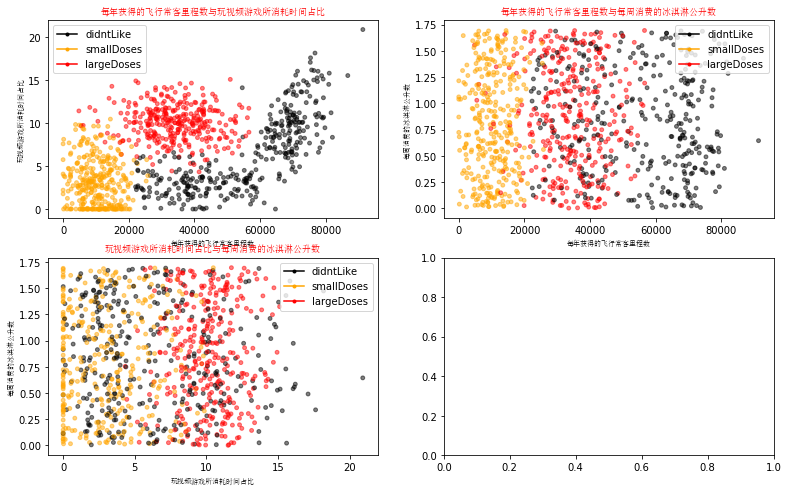

In [7]:
# 检测函数的执行结果
datingDataMat,datingLabels = file2matrix("D:\机器学习\机器学习实战（中文版+英文版+源代码）\Machine-Learning-in-Action-Python3-master\Machine-Learning-in-Action-Python3-master\kNN_Project1\datingTestSet.txt")
showdatas(datingDataMat, datingLabels)

## 2.2.3 准备数据：归一化数值

In [8]:
def autoNorm(dataSet):
    # 获取每列数据的最小值，返回值是一行
    minVals = dataSet.min(0)
    # 获取每列数据的最大值
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    # shape(dataSet)返回dataSet的矩阵行列数
    # 建立一个和dataSet型号一样的0矩阵
    normDataSet = np.zeros(np.shape(dataSet))
    # numpy函数shape[0]返回dataSet的行数
    m = dataSet.shape[0]
    # tile表示行数增加到minVals行，列数不变，于是生成minVals行、每行都是最小值的矩阵
    # 原始值减去最小值（x-xmin）
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    # 差值处以最大值和最小值的差值（x-xmin）/（xmax-xmin）
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    # 归一化数据结果，数据范围，最小值
    return normDataSet, ranges, minVals

In [9]:
# 检测函数的执行结果
normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


## 2.2.4 测量算法：作为完整程序验证分类器

In [10]:
def datingClassTest():
    # 打开文件名，注意路径
    filename = "D:\机器学习\机器学习实战（中文版+英文版+源代码）\Machine-Learning-in-Action-Python3-master\Machine-Learning-in-Action-Python3-master\kNN_Project1\datingTestSet.txt"
    # 调用file2matrix函数，将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    # 取所有数据的10%。hoRatio越小，错误率越低
    hoRatio = 0.10
    # 调用autoNorm函数，进行数据归一化，返回归一化数据结果、数据范围、最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 获取normMat的行数，如上文所示，用的是shape[0]函数
    m = normMat.shape[0]
    # 10%的测试数据的个数
    numTestVecs = int(m * hoRatio)
    # 分类错误计数
    errorCount = 0.0
    for i in range(numTestVecs):
        # 调用classify0函数，即分类器函数，得出的类别可以和已知的类别进行比较
        # 前numTestVecs个数据作为测试集，后m-numTestVecs个数据作为训练集
        # k选择label数+1（结果比较好）
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],\
                                     datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" % (errorCount/float(numTestVecs)*100))

In [11]:
# 检测函数的执行结果
datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3